# ПЗ_1 Манжола Богдан Валерійович. Варіант 23. Датасет "credit"

### 1. Імпорт бібліотеки та завантаження даних

In [1]:
from pycaret.datasets import get_data
data = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


### 2. Опис ознак датасету 'credit'
| Ознака         | Опис |
|---------------|-------------------------------------------------------------|
| LIMIT_BAL     | Ліміт кредиту |
| SEX           | Стать (1 = чоловік, 2 = жінка) |
| EDUCATION     | Рівень освіти (1 = graduate school, 2 = university і т.д.) |
| MARRIAGE      | Сімейний стан (1 = одружений, 2 = вільний і т.д.) |
| AGE           | Вік |
| PAY_1 - PAY_6 | Історія платежів (затримка платежу за попередні місяці) |
| BILL_AMT1-6   | Сума рахунку (баланс) за попередні місяці |
| PAY_AMT1-6    | Сума платежу за попередні місяці |
| default       | Цільова змінна: чи був дефолт (1 = дефолт, 0 = ні) |

### 3. Налаштування PyCaret для порівння моделей

In [16]:
from pycaret import classification
s = classification.setup(data = data,
                         train_size = 0.9,
                         target = 'default',
                         session_id=123)

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(24000, 24)"
4,Transformed data shape,"(24000, 24)"
5,Transformed train set shape,"(21600, 24)"
6,Transformed test set shape,"(2400, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


#### Порівняння моделей

In [17]:
best = classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8221,0.7799,0.3684,0.6798,0.4776,0.3817,0.4078,1.1110
lightgbm,Light Gradient Boosting Machine,0.8210,0.7773,0.3728,0.6711,0.4791,0.3816,0.4057,0.2070
ada,Ada Boost Classifier,0.8174,0.7737,0.3265,0.6815,0.4412,0.3479,0.3817,0.3080
rf,Random Forest Classifier,0.8158,0.7592,0.3680,0.6457,0.4684,0.3672,0.3885,0.8450
et,Extra Trees Classifier,0.8122,0.7518,0.3707,0.6273,0.4657,0.3609,0.3794,0.4810
lda,Linear Discriminant Analysis,0.8107,0.7177,0.2542,0.6967,0.3723,0.2883,0.3395,0.0280
lr,Logistic Regression,0.8032,0.7022,0.2117,0.6763,0.3216,0.2420,0.2985,0.9820
ridge,Ridge Classifier,0.7988,0.7177,0.1441,0.7249,0.2402,0.1803,0.2602,0.0190
dummy,Dummy Classifier,0.7789,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0170
knn,K Neighbors Classifier,0.7539,0.6014,0.1801,0.3804,0.2442,0.1192,0.1312,0.3940


In [18]:
print(best)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### 4. Оцінка, візуалізація моделі

#### Оцінка моделі через інтерактивний інтерфейс

In [19]:
classification.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

*Метод `evaluate_model()` відкриває інтерактивне вікно, де можна переглянути всі основні метрики моделі, графіки та статистику.*

#### Побудова матриці неточностей

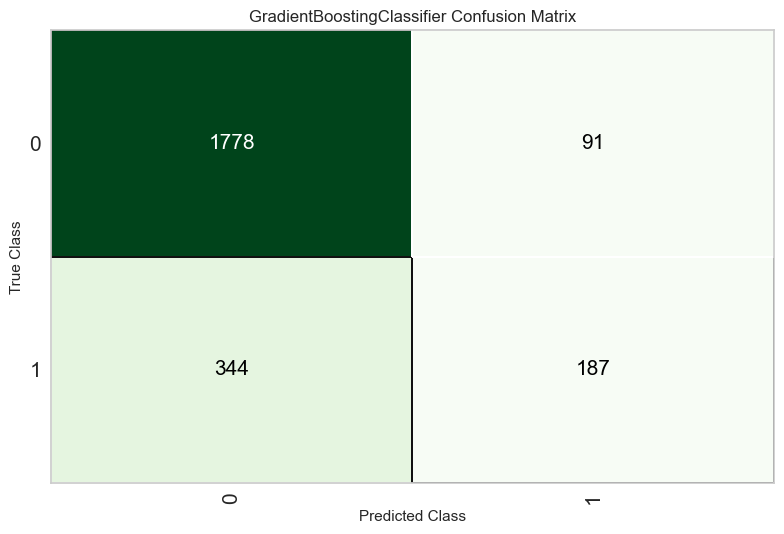

In [20]:
classification.plot_model(best, plot = 'confusion_matrix')

*Метод `plot_model()` з параметром `'confusion_matrix'` виводить матрицю неточностей, яка показує кількість правильних та неправильних передбачень моделі.*

#### Побудова ROC-кривої та обчислення AUC

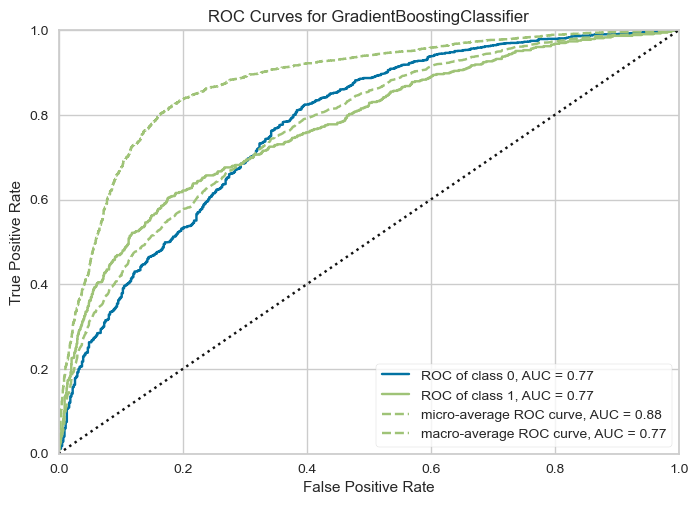

In [21]:
classification.plot_model(best, plot = 'auc')

*Метод `plot_model()` з параметром `'auc'` будує ROC-криву і показує значення площі під кривою (AUC), що є показником якості класифікаційної моделі.*

#### Важливість ознак

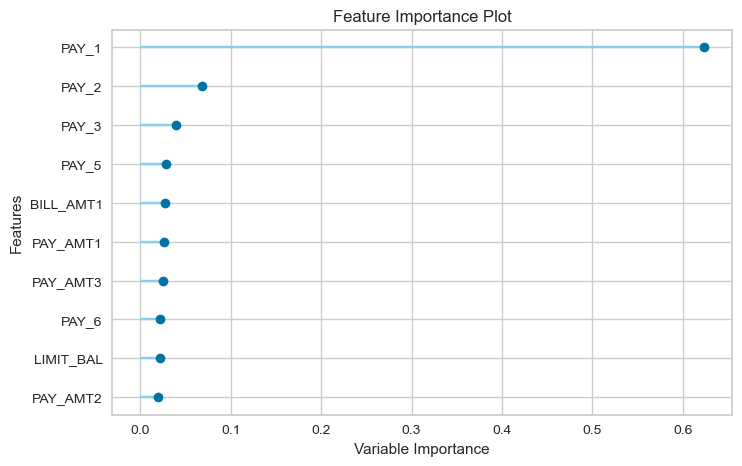

In [22]:
classification.plot_model(best, plot = 'feature')

*Метод `plot_model()` з параметром `'feature'` виводить графік важливості ознак, що демонструє, які ознаки найбільше впливають на результати моделі.*

### 5. Фіналізація моделі

In [23]:
final_best = classification.finalize_model(best)
print(final_best)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                             'MARRIAGE', 'AGE', 'PAY_1',
                                             'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                             'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                             'BILL_AMT3', 'BILL_AMT4',
                                             'BILL_AMT5', 'BILL_AMT6',
                                             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                             'PAY_AMT4', 'PAY_AMT5',
                                             'PAY_AMT6'],
                                    transform...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
 

### Прогноз, аналіз результатів та збереження моделі

#### Прогноз для тестових даних

In [24]:
predictions = classification.predict_model(final_best)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8221,0.7957,0.3597,0.6871,0.4722,0.3775,0.4062


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
20470,270000,2,1,2,31,-1,-1,0,-1,-1,...,8195.0,2254.0,1522.0,4065.0,4056.0,81.0,83.0,0,0,0.8887
11650,60000,2,3,1,43,2,2,-2,-2,-2,...,992.0,0.0,0.0,0.0,0.0,992.0,14000.0,1,1,0.6206
15723,20000,2,3,3,44,0,0,2,2,0,...,0.0,3599.0,1200.0,1000.0,400.0,0.0,0.0,1,0,0.7198
3930,30000,2,2,2,22,0,0,0,0,2,...,29850.0,1800.0,1500.0,2100.0,0.0,1800.0,1000.0,0,0,0.7723
19093,20000,1,2,2,21,0,0,0,0,0,...,0.0,1614.0,1750.0,1000.0,1000.0,0.0,0.0,0,0,0.8441


#### Вивід записів з високим prediction_score

In [25]:
high_confidence = predictions[predictions['prediction_score'] > 0.9]
high_confidence

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
19311,200000,1,2,2,28,0,0,0,-1,-1,...,862.0,5300.0,3000.0,8712.0,712.0,862.0,704.0,0,0,0.9021
18831,230000,2,1,2,41,-1,-1,-1,-1,0,...,46213.0,7000.0,15000.0,29000.0,30000.0,0.0,5000.0,0,0,0.9500
8913,210000,2,1,2,37,-1,-1,-1,0,-1,...,7418.0,19631.0,23906.0,0.0,3073.0,7418.0,11894.0,0,0,0.9323
19605,390000,1,1,2,32,-1,-1,-1,-1,-1,...,8637.0,13000.0,20971.0,14487.0,19020.0,43.0,14753.0,0,0,0.9654
12020,470000,1,2,1,35,0,0,0,0,0,...,185608.0,6500.0,8000.0,9000.0,7000.0,8000.0,8000.0,1,0,0.9068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,170000,2,1,2,30,-2,-2,-2,-2,-2,...,1285.0,1958.0,5956.0,1842.0,3959.0,1285.0,0.0,0,0,0.9051
11766,150000,2,2,2,29,0,0,0,0,0,...,63828.0,2841.0,3000.0,1839.0,1773.0,1792.0,1846.0,0,0,0.9171
10947,500000,1,1,2,32,-2,-1,0,0,0,...,2632.0,23008.0,20046.0,5075.0,5103.0,2646.0,20642.0,0,0,0.9644
12132,80000,2,2,2,24,0,0,0,0,0,...,23836.0,2007.0,2000.0,1014.0,0.0,23836.0,3000.0,0,0,0.9028


### 6. Збереження моделі

In [26]:
classification.save_model(final_best, 'credit_best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                              'MARRIAGE', 'AGE', 'PAY_1',
                                              'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                              'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                              'BILL_AMT3', 'BILL_AMT4',
                                              'BILL_AMT5', 'BILL_AMT6',
                                              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                              'PAY_AMT4', 'PAY_AMT5',
                                              'PAY_AMT6'],
                                     transform...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, los

## Висновки

В ході лабораторної роботи було виконано класифікаційний аналіз датасету 'credit' за допомогою PyCaret.
Проведено порівняння класифікаційних моделей, обрано найкращу модель за відповідними метриками,
проведено фіналізацію моделі та зроблено прогноз для тестових даних.
Найкраща модель збережена у форматі `.pkl` для подальшого використання.